---
title: "Forces in 1D"
authro: Yang Peng
institute: California State University, Northridge
format: 
  html:
    toc: true
    code-fold: false
    page-layout: full
    fig-cap-location: bottom
    number-sections: true
    number-depth: 2
jupyter: python3
---

# Newton's second law
The relation between force $\boldsymbol{F}$ and accelaration $\boldsymbol{a}$ is
$$
\boldsymbol{F} = m \boldsymbol{a}.
$$
- Here, $\boldsymbol{F}$ and $\boldsymbol{a}$ are vectors, with magnitudes and directions. 
- $\boldsymbol{F} = \boldsymbol{F}_{net}$ is the net (total) force on the object, namely
  $$
  \boldsymbol{F}_{net} = \sum_j \boldsymbol{F}_j.
  $$

## More on vectors
- In 1D, the directions are either left or right. One can use _positive_ or _negative_ sign to indicate the direction. 
- Namely, we can introduce a _unit vector_ $\hat{\boldsymbol{x}}$, which is of magnitude 1 and with direction to the right. 
- Any other vectors can be written as $\boldsymbol{x} = x \hat{\boldsymbol{x}}$, where $x>0$ means the vector is pointing to the right. Note that the magnitude of the vector will be $|x|$.  

## Acceleration and Forces on a Lunar Lander
You are leading a team that is building the return module for the next lunar
expedition.
You have designed a module that breaches if exposed to air resistance forces above $10^6$ N for more than $5$ s. The mass of the module is $5000$ kg. 

The landing process is sketched in @fig-lunar_lander (a).

![(a) Sketch of descent of the reentry module, (b) free-body diagram of the module during reentry](./force_1d_files/lunar_lander.png){#fig-lunar_lander}

To analyze this process, the first step is to draw the _free body diagram_, as shown in @fig-lunar_lander (b). 

The module is in contact with the surrounding air, giving rise to the air drag force, $\boldsymbol{F}_D$, which acts upward when the module is moving downward. This is a type of _contact force_. 
In addition, it is affected by a _long-range force_ --- the gravitational
force from the Earth, $\boldsymbol{G}$, which acts downward toward the Earth.

We can now apply Newton's second law. The net force on the module is
$$
\boldsymbol{F}_{net} = \boldsymbol{F}_D + \boldsymbol{G} = m \boldsymbol{a}.
$$

Let us assume the moving is moving along $y$ axis, and we write $\boldsymbol{F}_D = F_D\hat{\boldsymbol{y}}$, where $\hat{y}$ is a unit vector pointing upward. 
Then the gravitational force $\boldsymbol{G} = -mg\hat{\boldsymbol{y}}$, where $m$ is the mass and $g\simeq 9.8 \mathrm{m/s^2}$ is the gravitational accelaration. 

The module is slowing down, so the accelaration $\boldsymbol{a} = a_y \hat{\boldsymbol{y}}$, with $a_y>0$.

Hence, we have
$$
\boldsymbol{F}_D = F_D\hat{\boldsymbol{y}} = m(a_y + g)\hat{\boldsymbol{y}},
$$
which means
$$
F_D = m(a_y + g).
$$

Now, if we can measure the accelaration $a_y(t)$ of the module at different times, then we can extrat the drag force $F_D(t)$ at different times as well. 
This is done in the following code, where we take some data for $a_y(t)$.

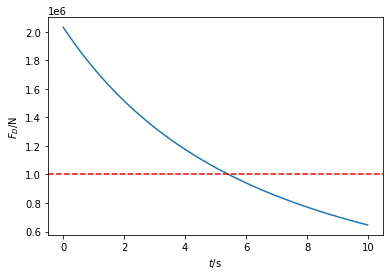

In [15]:
import matplotlib.pyplot as plt
import numpy as np
filename = 'https://raw.githubusercontent.com/pengyangraul/phy_python/main/force_1d_files/reentry.txt'
t,a = np.loadtxt(filename,unpack=True)
g = 9.8 # m/s^2
m = 5000.0 # kg
D = m*(a+g)
plt.plot(t,D)
plt.xlabel('$t$/s')
plt.ylabel('$F_D$/N')
plt.axhline(y = 1e6,linestyle='--',color='r')

We see the drag force is monotonically decreasing. We can find the time when the air resistance force becomes less than the critical value $F_D^c = 10^6$N.
This is done via `t[D<1e6][0]`, and you should get `5.4246`, which is longer than $5$s. The module will be distroyed!

# Force Models
In order to use Newton's second law to determine the acceleration of an object, we need to find out how large a force is --- we need to determine its magnitude and direction. We call such models "force models". The force models may be based on direct, experimental measurements. We often call such models phenomenological or experimental force models. The force models can also be based on a more fundamental model or a model based on a microscopic view of the interactions.

In the following we introduce models for some of the most common types of forces acting between macro- and microscopic objects. These models will be your toolbox for addressing physical processes-you need to continually build on this toolbox, as this will be your reservoir of physical knowledge.

Examples:
- If you want to describe a ball falling through air, you need mathematical expressions for the forces on the ball: both the force due to gravity and the force due to air resistance. 
-  If you want to describe the motion of a nanometer sized particle in water close to a charged surface you need to introduce (probably sophisticated) models for the forces between the particle and the individual water molecules and between the particle and the surface.

## Force model: Gravity
### Newton's universal law of gravity
$$
\boldsymbol{F}_{\mathrm{from\  B\ on\ A}} = \gamma \frac{m M}{r_{AB}^2}\hat{\boldsymbol{r}}_{AB}
$$
Here, we use the notation $\boldsymbol{r}_{AB}$ to denote the vector pointing from the center of object A to the center of object B. Its magnitude we write as $r_{AB} = |\boldsymbol{r}_{AB}|$. $\hat{\boldsymbol{r}}_{AB}$ is the corresponding unit vector for the direction. $\gamma$ is the gravitational constant. $m$ and $M$ are the masses. 

### Constant gravity
The general gravitational law becomes simpler for an object near the surface of the Earth or another planet. In this case, the distance $r_{AB}$ from the object to the center of the Earth is approximately constant and equal to the radius $R$ of the Earth. See @fig-constant_gravity. 

![The gravitational force $\boldsymbol{F}$ from object B on object A](./force_1d_files/constant_gravity.png){#fig-constant_gravity}

In this case, we approximate gravitational force
$$
\boldsymbol{G} = -m\frac{\gamma M}{R^2}\hat{\boldsymbol{r}}
$$
where $\hat{\boldsymbol{r}}$ is the unit direction vector pointing from the earth center to the object. The minus sign indicates that the force is an attraction force. We can then define the gravitation accelaration
$$
g = \frac{\gamma M}{R^2},
$$
which makes the gravitational force on earth equals $\boldsymbol{G} = -mg\hat{\boldsymbol{r}}$.

## Force model: Viscous Force
You will often encounter objects that are in contact with a surrounding fluid such as a air or water. We therefore need a force model for the interaction between fluids and solid objects. Unfortunately, there is no fundamental law of nature for such an interaction. Instead, we must determine the force model from experiments or calculations based on an underlying model for fluid flow, and use this result as our model. Fortunately, experiments and calculations show that the force from the fluid has a simple form --- it depends on the velocity of the object.

### Drag Force at Low Velocities
If you pull a sphere through water, you expect a contact force FD from the water on the sphere counteracting the motion of the sphere relative to water because water is forced to flow around the sphere. At low velocities, it has been shown experimentally and theoretically that the drag force $\boldsymbol{F}_D$ is proportional to the velocity of the object relative to the fluid, namely
$$
\boldsymbol{F}_D = - k_v \boldsymbol{v}.
$$
Here, $k_v$ is a proportion constant that depends on the objects size, shape and surface, as well as the _viscosity_ of the fluid. 

For a sphere, Stokes showed that at low velocities that $k_v = 6\pi\eta R$, where $R$ is the radius of the sphere, and $\eta$ is the viscosity of the fluid. For air, $\eta = 1.82 \times 10^{-5}\mathrm{N\cdot s \cdot m^{-2}}$ (room temperature). 
If the force is proportional to velocity, we call it a _viscous force_. 

### Drag Force at High Velocities

At larger velocities the fluid flow around the object becomes more irregular, see @fig-viscous_force. The drag force is not mainly related to the forces required to drag the fluid along the surface of the object, but instead depends on the under-pressure generated behind the object.

![Illustration of a drag force on an object due to the motion of the object relative to the surrounding fluid. At low velocities the fluid flow around the object is smooth, and the force is approximately proportional to the velocity. At higher velocities, the fluid flow becomes turbulent near the surface, the flow becomes irregular, and the force is approximately proportional to the square of the velocity](./force_1d_files/viscous_force.png){#fig-viscous_force}

In this case, the force is proportional to the square of the velocity, and we call this law the square law of air resistance
$$
\boldsymbol{F}_D = -Dv^2 \hat{\boldsymbol{v}}.
$$
Here $D$ is another constant and for spherical object experiments have shown that $D \simeq 12.0 \rho R^2$, where $\rho$ is the density of the fluid. 

### General Model for Fluid Drag
The behaviors for low and high velocities are special cases of a more general model for the drag force. Experiments show that the drag force can be written in the general
form:
$$
F_D  = \frac{1}{2} \rho S C_D(v, \eta, \rho, d)v^2.
$$
- $\rho$ is the density of the fluid. 
- $S$ is the cross-sectional area of the object, which is $S = \pi R^2$ for spherical objects. 
- $v$ is the speed of the object relative to the fluid. 
- $\eta$ is the viscosity of the fluid.
- $d$ is the characteristic length scale, such as the diameter of the sphere. 
- The coefficient $C_D(\dots)$ is called the _drag coefficient_.

Remarkably, experiments showed that the drag coefficient only depends on one number, $Re$, called the _Reynold's number_,
$$
C_D(v,\eta,\rho,d) = C_D(Re), \quad Re = \frac{\rho d}{\eta} v. 
$$

This is a surprisingly compact description with many interesting implications. For example, if you increase the velocity by a factor 10 you get the same drag coefficient if you either reduce the radius by a factor 10 or increase the viscosity by a factor 10. 

At low velocities, we expect to recover Stokes' general result: $F_D = 6\pi \eta R v$, which implies $C_D(Re) \propto Re^{-1}$. This is shown in @fig-drag-coefficient, where 
$Re^{-1}$  is shown as a straight line.  

![The drag coefficient CD as a function of Reynold’s number, $Re=\rho d v/\eta$ based on experimental data.](./force_1d_files/drag_coefficient.png){#fig-drag-coefficient}.

At large velocities, we see that the $C_D$ is approximately a constant, and the force is proportional to velocity square. 

Something strange happens when the Reynold’s number reaches $Re=3.2\times 10^5$. The drag coefficient drops significantly. This effect is due to _boundary-layer turbulence_, which we will not explain. The transition point where this effect kicks in depends on surface properties of the object. For a rough surface, such as that of a golf ball, the transition occurs for a lower Reynold's number than for a smooth ball. This is the reason why golf balls have a rough surface: The air drag force for large velocities is reduced by this design.

What happened to aerodynamic design? This is also hidden in the drag coefficient. The value of the drag coefficient depends on the shape of the object, and more aerodynamic designs have lower drag coefficients for approximately the same crosssectional area, as illustrated in @fig-aerodynamics.

![ The drag coefficient CD at the same velocity for object with the same crosssectional area, but with different shapes](./force_1d_files/aerodynamics.png){#fig-aerodynamics}

### Example: Falling Raindrop
This example demonstrates how we can find the motion of an object subject to a constant force (gravity), and to a velocity-dependent force. 

#### Model
Raindrops are often as small as $d=1$ mm in diameter as they start falling. We first draw the free-body diagram, in @fig-raindrop. 

![Left Illustration of a raindrop falling down. Right Free-body diagram for the drop. (Notice that a real raindrop is neither perfectly spherical nor "drop-shaped", it is pushed flat by the air resistance force)](./force_1d_files/raindrop.png){#fig-raindrop}

We can simply choosing downward as the positive direction, and we can write the drag force magnitude
$$
F_D = k_v v(t),
$$
where $v(t)$ is the magnitude of the velocity at time $t$. 

We apply Newton's second law
$$
mg - k_v v(t) = ma.
$$

#### No drag limit
When there is no drag, we have $a = g$, which means the raindrop is free-falling. 

#### Simplified model: Constant velocity
What will happen as the drop starts to fall?
It starts from zero velocity, so initially the accelaration is $a = g$.
As the drop falls, the velocity is increasing (in magnitude), and the accelaration $a = g - (k_v/m)v$ will decrease in magnitude, and therefore approach zero. 

When the acceleration becomes zero, the velocity will no longer change. The drop will have reached a stationary velocity --- a velocity that does not change with time.
We call this velocity the terminal velocity $v_T= mg/k_v$. We therefore expect the drop to approach the velocity $v = -v_T$ as time increases. 

#### Full model with numerical solution
Since we know the initial condition $a = g$ and the so-called _asymptotic behavior_: $a \to 0 \mathrm{m/s^2}$ and $v \to v_T$. We can update the velocity according to the following rules:
$$
v(t_i + \Delta) = v(t_i) +  \Delta t \cdot a(t_i, v(t_i)),
$$
where we have discretized the continuous time to $t_0, t_1, t_2, \cdots$, and $t_i = i\Delta t$, with discretization step $\Delta t$.
The accelaration at time $t_i$ can be computed as
$$
a(t_i, v(t_i)) = g - (k_v/m)v(t_i).
$$
This can be implemented with the following code. For the parameter, we take the radius of the drop $r = 0.5\mathrm{mm}$, then the mass can be computed according to 
$$
m = \rho V = \rho \frac{4\pi}{3}r^3.
$$
The coefficient $k_v$ can be obtained from Stokes' formula,
$$
k_v = 6\pi r \eta,
$$
with the viscosity of the air $\eta = 1.82 \times 10^{-5}\mathrm{N s m^{-2}}$ 

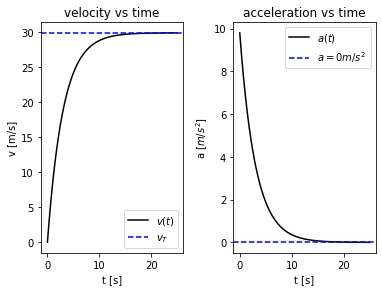

In [24]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.8 # m/s^2
r = 0.5e-3 # m
rho = 1.0e3 # kg/m^3
m = rho * 4*np.pi/3*r**3 # kg
eta = 1.82e-5 # Nsm^-2
kv = 6*np.pi*r*eta # Nsm^-1

# Terminal velocity
vT = m*g/kv

# initial condition 
dt = 0.05
steps = 500
vlist = np.zeros(steps)
alist = np.zeros(steps-1)
tlist = np.arange(steps)*dt

for jj in range(steps-1):
    alist[jj] = g - (kv/m)*vlist[jj]
    vlist[jj+1] = vlist[jj] + alist[jj]*dt

# Create two subplots, in 1 row, with 2 columns
fig,ax = plt.subplots(1,2)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.25)
# first subplot
ax[0].set_title('velocity vs time')
ax[0].plot(tlist,vlist,'k-', label='$v(t)$')
ax[0].axhline(y = vT, linestyle='--',color = 'blue',label='$v_T$')
ax[0].set_xlabel('t [s]')
ax[0].set_ylabel('v [m/s]')
ax[0].legend()
# second subplot
ax[1].set_title('acceleration vs time')
ax[1].plot(tlist[:-1],alist,'k-', label='$a(t)$')
ax[1].set_xlabel('t [s]')
ax[1].set_ylabel('a [$m/s^2$]')
ax[1].axhline(y =0 , linestyle='--',color = 'blue',label='$a=0 m/s^2$')
ax[1].legend()

plt.show()

##  Force Model: Spring Force
The contact forces between two solid objects come from the deformation of the objects.

### Spring Force
The force $F$ (magnitude) required to extend an object by $\Delta L$ is the _spring force_
$$
F = k\Delta L.
$$
The direction of the spring force is opposite to extending direction. 

Similarly, when compressing the object by $\Delta L$, the magnitude of the force is the same, with an opposite direction. 

### Example: Motion of a Hanging Block
A block of mass $m = 1$ kg is hanging from a spring with spring constant $k=100$ N/m. The other end of the spring is attached to the ceiling, as shown in @fig-spring_block. We want to simulate the motion of the block after it is released, and then make the model more realistic by adding air resistance.

![Sketch of a block hanging in a spring (left), and the free-body diagram of the system (right)](./force_1d_files/spring_block.png)